# Titanic - Machine Learning from Disaster


In [12]:
import numpy as np
import pandas as pd

In [13]:
train_data = pd.read_csv("input/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
test_data = pd.read_csv("input/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Brief EDA

In [24]:
train_data.shape

(891, 12)

In [25]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [26]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
train_data.duplicated().sum()

0

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Survival rate by sex

Text(0.5, 1.0, 'Survival Rate by Class')

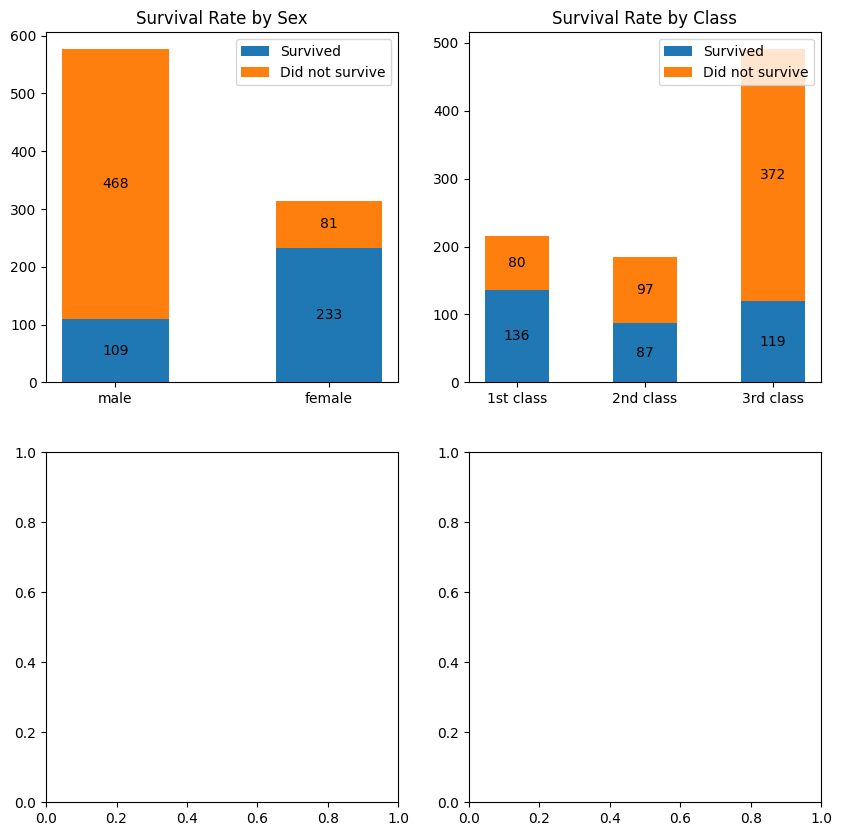

In [62]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Survival by Sex
sex = train_data[['Sex', 'Survived']]
male_count = len(sex[(sex['Sex']=='male')])
male_survived = len(sex[(sex['Sex']=='male') & (sex['Survived']==1)])
female_count = len(sex[(sex['Sex']=='female')])
female_survived = len(sex[(sex['Sex']=='female') & (sex['Survived']==1)])
sex_labesls = ('male', 'female')
sex_counts = {
    "Survived": np.array([male_survived, female_survived]),
    "Did not survive": np.array([male_count - male_survived, female_count - female_survived]),
}
bottom0 = np.zeros(2)
for boolean, sex_count in sex_counts.items():
    p = axes[0, 0].bar(sex_labesls, sex_count, 0.5, label=boolean, bottom=bottom0)
    bottom0 += sex_count
    axes[0, 0].bar_label(p, label_type='center')
axes[0, 0].legend(loc="upper right")
axes[0, 0].set_title("Survival Rate by Sex")

# Survival by Pclass
pclass = train_data[['Pclass', 'Survived']]
class1_count = len(pclass[(pclass['Pclass']==1)])
class1_survived = len(pclass[(pclass['Pclass']==1) & (pclass['Survived']==1)])
class2_count = len(pclass[(pclass['Pclass']==2)])
class2_survived = len(pclass[(pclass['Pclass']==2) & (pclass['Survived']==1)])
class3_count = len(pclass[(pclass['Pclass']==3)])
class3_survived = len(pclass[(pclass['Pclass']==3) & (pclass['Survived']==1)])
class_labesls = ('1st class', '2nd class', '3rd class')
class_counts = {
    "Survived": np.array([class1_survived, class2_survived, class3_survived]),
    "Did not survive": np.array([class1_count - class1_survived, class2_count - class2_survived, class3_count - class3_survived])
}
bottom1 = np.zeros(3)
for boolean, class_count in class_counts.items():
    p = axes[0, 1].bar(class_labesls, class_count, 0.5, label=boolean, bottom=bottom1)
    bottom1 += class_count
    axes[0, 1].bar_label(p, label_type='center')
axes[0, 1].legend(loc="upper right")
axes[0, 1].set_title("Survival Rate by Class")


## Random Forest Model

This is the model used for the [tutotial](https://www.kaggle.com/code/alexisbcook/titanic-tutorial).

Will expand further, thus, name of output DataFrame is changed and a submission CSV is not made. 

In [15]:
from sklearn.ensemble import RandomForestClassifier

y = train_data["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

rfc = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
# rfc.to_csv('submission.csv', index=False)
# print("Your submission was successfully saved!")


In [16]:
rfc.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
